In [1]:
%matplotlib inline

import numpy as np
import scipy.io as sio
import pandas as pd
import os 
import math 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import sys 
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import autograd
from torch.autograd import Variable
import iisignature as signature

from Tools import *
from WGAN import * 
from Training_loop import train 
from Plots import *


os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Real data

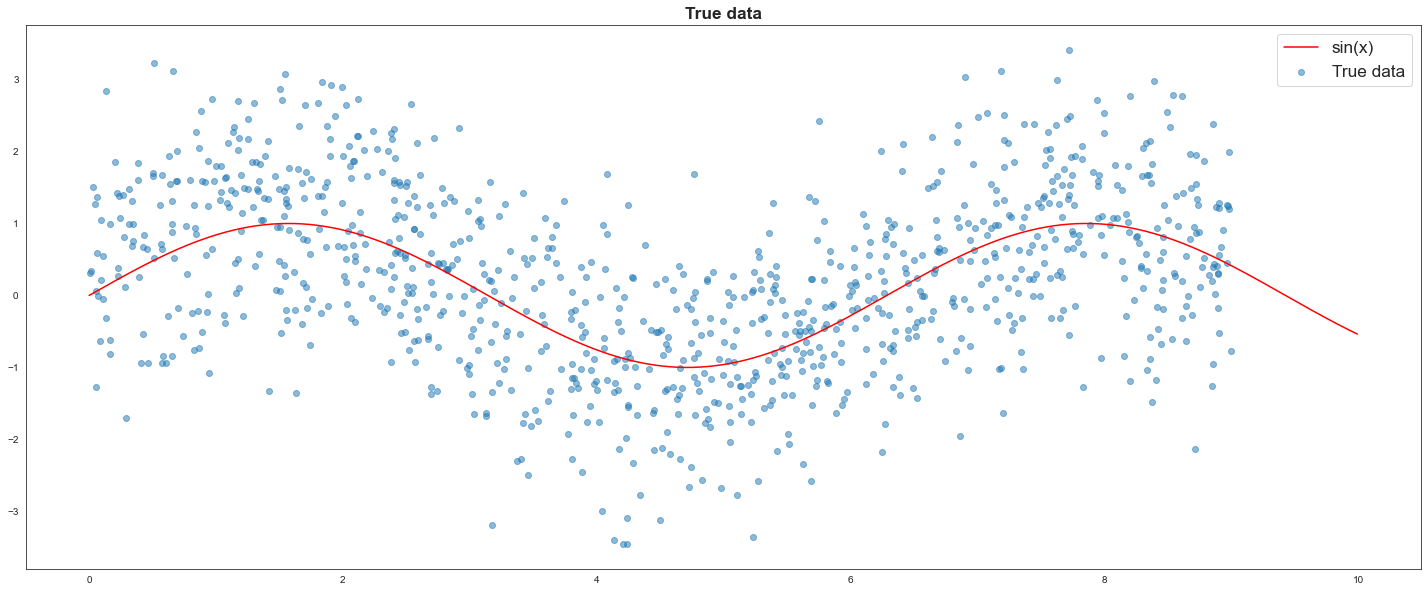

In [2]:
xy = generateur_donnees(sample_size = 1000, variance=1)

points = np.arange(0,10,0.01)
sin = np.sin(points)


sns.set_style('white')


f,ax = plt.subplots(figsize=(25,10))


ax.set_title('True data', fontsize='xx-large', fontweight='bold')
ax.scatter(xy[:,0],xy[:,1], alpha=0.5, label = 'True data')
ax.plot(points,sin, c='red', label='sin(x)')
ax.legend(fontsize='xx-large')
plt.show()

## Training the WGAN

In [3]:
noise_size = 3 #Taille du bruit en input, ie dimension de l'espace latent du générateur 

n_it = 12000

var = 0.5

gen = generateur(noise_size,50,2)
discrim = discriminateur(input_length=2,middle_length=50)

optimisateur_generateur = optim.Adam(gen.parameters(),lr = 0.0001, betas = (0.5,0.999))
optimisateur_discriminateur = optim.Adam(discrim.parameters(),lr=0.0001, betas = (0.5,0.999))

erreur_discrim_sur_fake,erreur_discrim_sur_true, gradient = train(variance = var,discriminator = discrim, generator = gen, optigen = optimisateur_generateur, optidiscri= optimisateur_discriminateur,iterations = n_it, noise_size = noise_size)

Iteration 0 done...
Iteration 100 done...
Iteration 200 done...
Iteration 300 done...
Iteration 400 done...
Iteration 500 done...
Iteration 600 done...
Iteration 700 done...
Iteration 800 done...
Iteration 900 done...
Iteration 1000 done...
Iteration 1100 done...
Iteration 1200 done...
Iteration 1300 done...
Iteration 1400 done...
Iteration 1500 done...
Iteration 1600 done...
Iteration 1700 done...
Iteration 1800 done...
Iteration 1900 done...
Iteration 2000 done...
Iteration 2100 done...
Iteration 2200 done...
Iteration 2300 done...
Iteration 2400 done...
Iteration 2500 done...
Iteration 2600 done...
Iteration 2700 done...
Iteration 2800 done...
Iteration 2900 done...
Iteration 3000 done...
Iteration 3100 done...
Iteration 3200 done...
Iteration 3300 done...
Iteration 3400 done...
Iteration 3500 done...
Iteration 3600 done...
Iteration 3700 done...
Iteration 3800 done...
Iteration 3900 done...
Iteration 4000 done...
Iteration 4100 done...
Iteration 4200 done...
Iteration 4300 done...


## Visualise the results

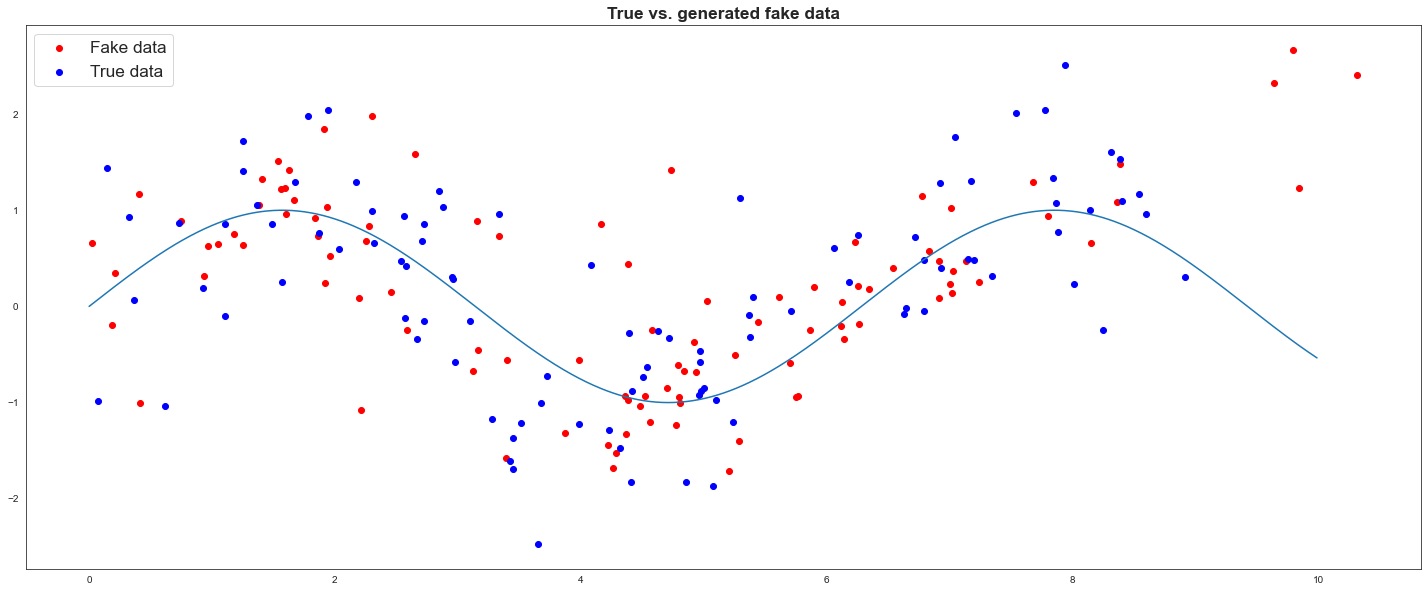

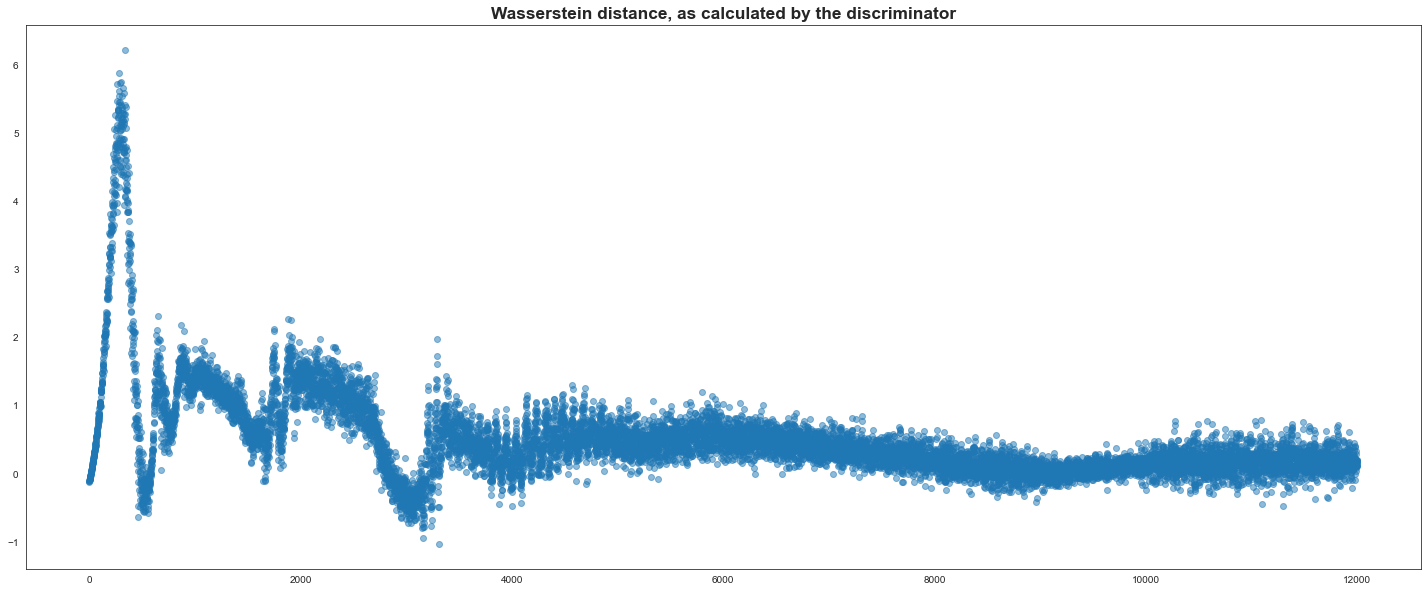

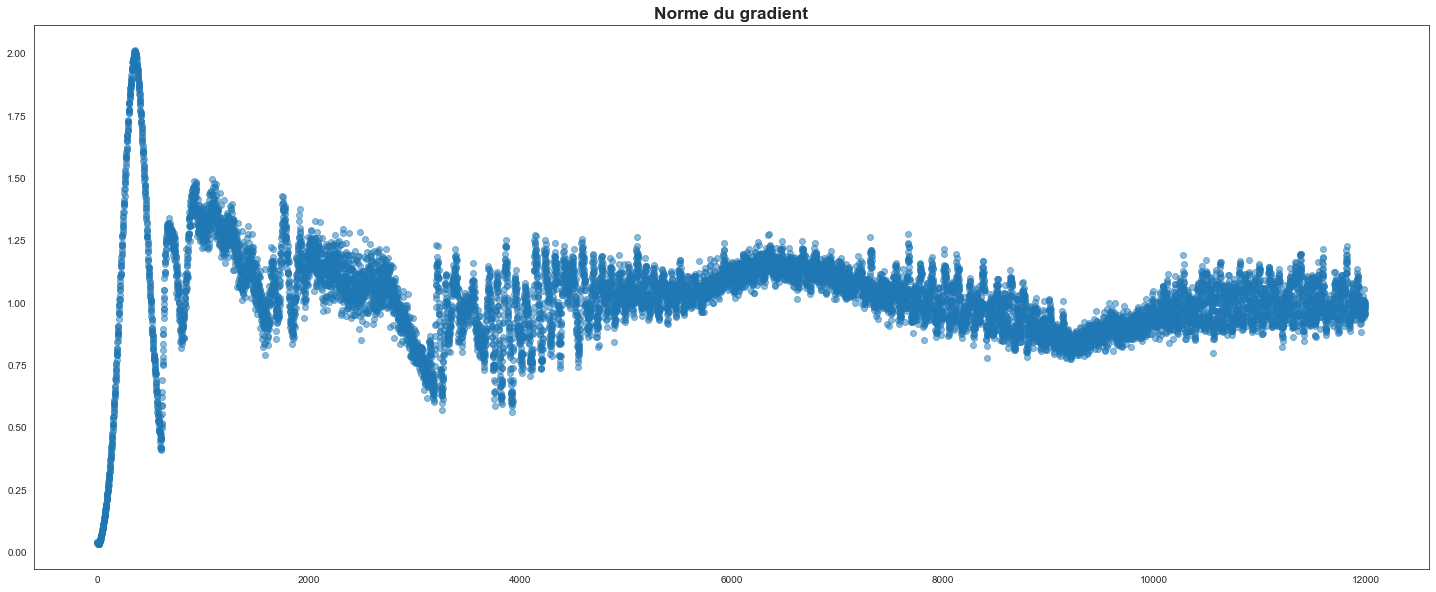

In [4]:
new_noise = torch.normal(mean = torch.zeros(100,noise_size)).float()

output_fake = gen.forward(new_noise)
output_fake = output_fake.detach().numpy()

erreur_discrim_sur_true = np.array(erreur_discrim_sur_true)

gradient = np.array(gradient)

true_data = generateur_donnees(100)

plot_training_results(fakedata=output_fake,truedata= true_data,w1_distance = erreur_discrim_sur_true , gradient = gradient)

## Plot true and generated (empirical) densities

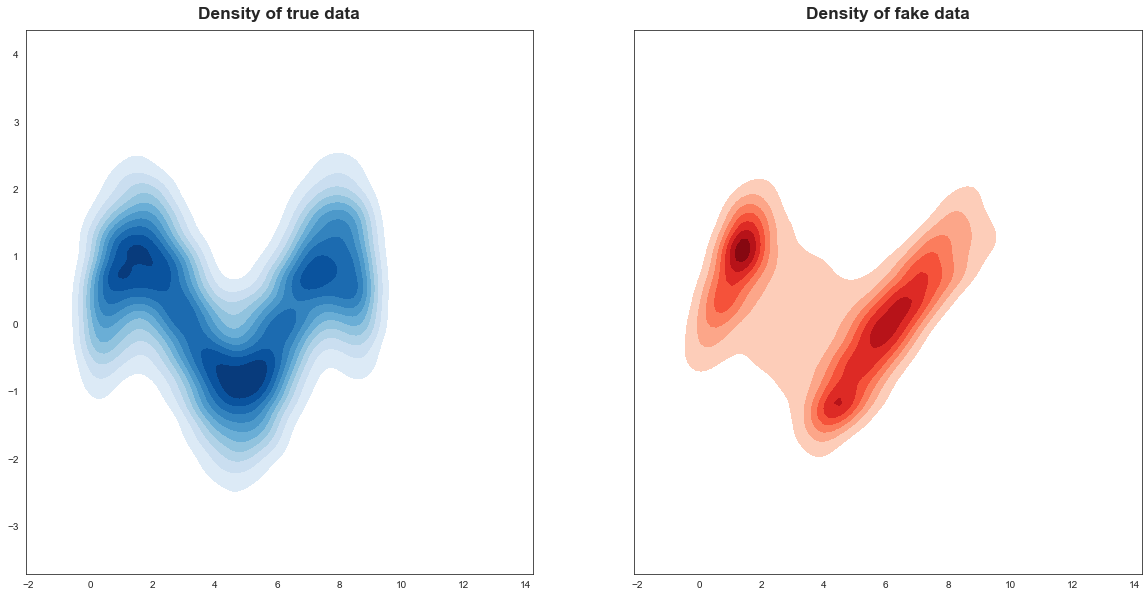

In [5]:
sample_size = 10000

n_noise = torch.normal(mean = torch.zeros(sample_size,noise_size)).float()

data = gen.forward(n_noise)

data = data.detach().numpy()

data_true = generateur_donnees(10000)

data_true = data_true.detach().numpy()

plot_densities(fakedata=data,truedata = data_true)

## Perform Kolmogorov-Smirnoff test for both dimensions

In [6]:
perform_ks_test(data,data_true)

Result for dimension 1 :  Ks_2sampResult(statistic=0.0281, pvalue=0.0007439049103464535)
Result for dimension 2 :  Ks_2sampResult(statistic=0.0487, pvalue=9.939201212766155e-11)


## Plot empirical CDFs

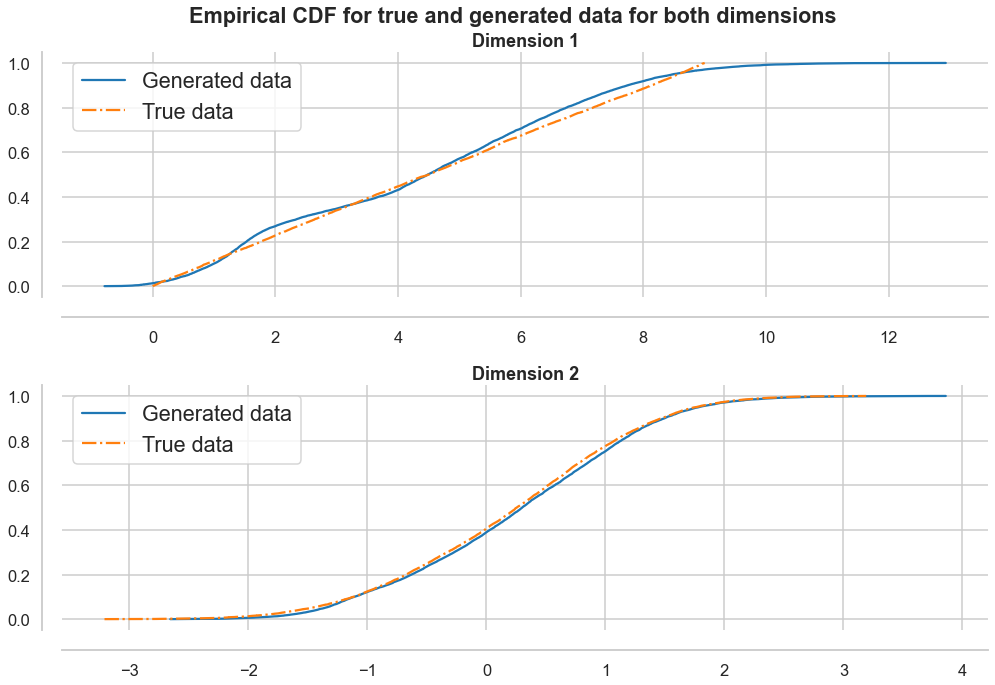

In [7]:
plot_cdf(data, data_true)